# ATMO 656A - Homework 1

Edgardo I. Sepulveda Araya

Importing libraries:

In [185]:
import numpy as np
import random                   # Library to create a random number
import time                     # Library to retrieve computing time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [106]:
# My colors for figures:
colors = [(29/255,91/255,162/255), (169/255,23/255,38/255),
          (229/255,179/255,69/255), (131/255,170/255,69/255),
          (116/255,24/255,123/255), (202/255,91/255,46/255),
          (107/255,188/255,233/255), 'grey', 'black'] 

### Scattering Distribution Function:

In [3]:
def scatang(N, intervals, g):
    mu    = np.zeros(N+1)
    amu   = np.zeros(N)
    THETA = np.zeros(N)
    mu[0] = -1.0
    
    a = (2*g) / (N * (1 - g**2))
    
    for i in range(N):
        b = np.sqrt(1 + g**2 - 2*g*mu[i])
        mu[i+1]  = (1 / (2*g)) * (1 + g**2 - 1/((a + 1/b)**2))
        amu[i]   = (mu[i+1] + mu[i]) / 2.0
        THETA[i] = np.arccos(amu[i]) # In radians
        
    return amu, THETA

$\Theta$ is respect to complete forward direction

#### Testing scatang function by using the Henyey-Greenstein scattering function:

In [4]:
N         = 200 # Number of intervals in scattering probabilty distribution (NNN = 200)
intervals = np.zeros(N)

In [5]:
scat_test_099 = scatang(N, intervals, 0.99)
scat_test_001 = scatang(N, intervals, 0.001)

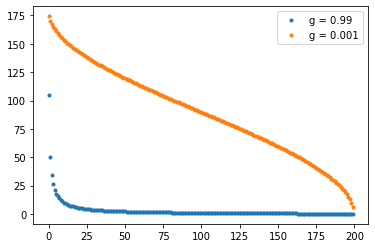

In [6]:
plt.plot(np.rad2deg(scat_test_099[1]), '.', label = 'g = 0.99')
plt.plot(np.rad2deg(scat_test_001[1]), '.', label = 'g = 0.001')
plt.legend()

In [7]:
gs      = [0.001, 0.1, 0.3, 0.5, 0.8, 0.9, 0.95]
p_theta = np.zeros((N,len(gs)))
thetas  = np.zeros((N,len(gs)))
for i in range(len(gs)):
    gi = gs[i]
    theta_test   = scatang(N, intervals, gi)
    p_theta_i    = (1/(4*np.pi)) * ( (1-gi**2) / ( (1+gi**2-2*gi*np.cos(theta_test[1]))**(3/2) ) )
    thetas[:,i]  = np.rad2deg(theta_test[1])
    p_theta[:,i] = p_theta_i

Figure:

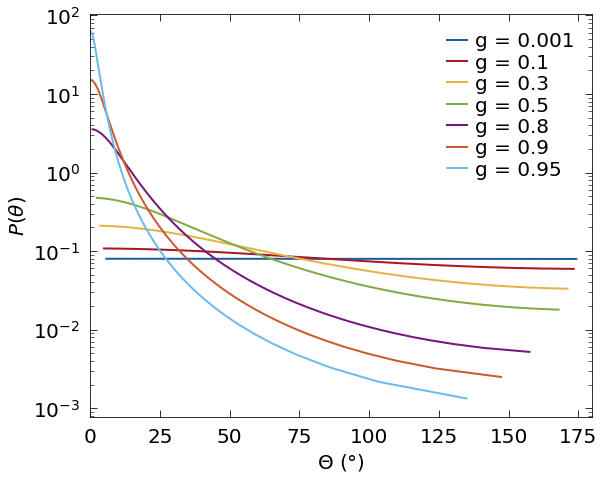

In [8]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.2, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

handles = []
labels  = []
for i in range(len(gs)):
    globals()['h'+str(i)] = ax.plot(thetas[:,i], p_theta[:,i],
                                    color = colors[i], alpha = 1,
                                    linestyle = 'solid', linewidth = 2)
    handles = handles + eval('h'+str(i))
    labels.append('g = ' + str(gs[i]))

# X Axis:
ax.set_xlabel(r'$\Theta$ (°)', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(0, 180)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
# Y Axis:
ax.set_ylabel(r'$P(\theta)$', fontsize = fontsize1, color = 'black', labelpad = 5)
#ax.set_ylim(0,20)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.set_yscale('log')

# LEGEND:
legend  = ax.legend(handles, labels, loc='upper right', ncol=1,
                    handlelength = 1, handletextpad = .4, labelspacing = .12,
                    columnspacing = 1.5, numpoints = 1, frameon = False,
                    prop = {'size': fontsize1})

### Monte Carlo Radiative Transfer Function:

In [67]:
def mc_radtran(n_photons, g, w_0, mu_0, tau):
    time_start_gen = time.time()
    
    theta_0 = np.arccos(mu_0) # Zenith angle (respect to z axis?) in radians (THETA0) (use np.rad2deg() to transform to degrees)
    phi_0   = 3*np.pi/2 # Is this angle phi from spherical coordinates? (270º)
    x0      = 0 # Initital position x (X0 = 0.0)
    y0      = 0 # Initial position y (Y0 = 0.0)
    l_0     = 1 # units?
    z_base  = 0 # Position of "cloud" base (ZBASE = 0.0)
    z_top   = tau / l_0  # Position of "cloud" top (ZTOP = 4.0) From z_top = tau / l_0 = tau / 1
    z0      = z_top # (Z0 = ZTOP)
    
    N_R = 0 # Number of photons reflected
    N_T = 0 # Number of photons tramsitted
    N_A = 0 # Number of photons absorbed

    #l_list = []
    #x_list = []
    #y_list = []
    #z_list = []
    N_I_list = []
    R_list = []
    T_list = []
    A_list = []
    #theta_list = []
    #THETA_s_list = []
    time_per_photon_list = []
    
    Ti_list = []
    Ri_list = []
    Ai_list = []

    for i in range(n_photons):
        time_start_per_photon = time.time()
        N_I_list.append(i + 1)
        #l_photon_list = []
        #x_photon_list = []
        #y_photon_list = []
        #z_photon_list = []
        #theta_photon_list = []
        #THETA_s_photon_list = []

        theta = theta_0
        phi   = phi_0
        # random number in interval [0, 1) for free path (ran1(II))
        Ri = random.random()
        #while Ri == 0: Ri = np.random.random(1)[0] # To avoid l = 0
        l = -1.0 * np.log(1 - Ri) # Free Path
        #l_photon_list.append(l)
        x = x0 + l * np.sin(theta) * np.cos(phi) # First step change in x
        #x_photon_list.append(x)
        y = y0 + l * np.sin(theta) * np.sin(phi) # First step change in y
        #y_photon_list.append(y)
        z = z0 + l * np.cos(theta)               # First step change in z
        #z_photon_list.append(z)

        #kkk = 0
        while True: # Photon collision iteration
            # Absorption:
            # random number in interval [0, 1] to check scattering or absoprtion (ran1(II)):
            Ri = random.uniform(0,1)
            if w_0 < Ri: 
                N_A += 1
                break

            # Reflection:
            if z > z_top:
                N_R += 1
                break

            # Transmission:
            if z < z_base:
                N_T += 1
                break

            # random number in interval [0, 1) to pick any scattering angle from distribution created (ran1(II)):
            Ri          = random.random()
            THETA_s_pos = int(Ri * 200)
            THETA_s     = THETA_s_distribution[1][THETA_s_pos]

            # random number in interval [0, 1) to pick any PHI scattering angle (ran1(II)):
            Ri         = random.random()
            PHI_s      = 2 * np.pi * Ri

            # random number in interval [0, 1) for free path (ran1(II))
            Ri = random.random()
            #while Ri == 0: Ri = np.random.random(1)[0] # To avoid l = 0
            l = -1.0 * np.log(1 - Ri)
            dx = l * (np.sin(THETA_s) * np.sin(PHI_s) * np.cos(theta) * np.cos(phi) + np.sin(THETA_s) * np.cos(PHI_s) * np.sin(phi) +
                      np.cos(THETA_s) * np.sin(theta) * np.cos(theta))
            dy = l * (np.sin(THETA_s) * np.sin(PHI_s) * np.cos(theta) * np.sin(phi) - np.sin(THETA_s) * np.cos(PHI_s) * np.cos(phi) +
                      np.cos(THETA_s) * np.sin(theta) * np.sin(phi))
            dz = l * (np.cos(THETA_s) * np.cos(theta)
                      - np.sin(THETA_s) * np.sin(PHI_s) * np.sin(theta))

            x += dx
            y += dy
            z += dz

            #x_photon_list.append(x)
            #y_photon_list.append(y)
            #z_photon_list.append(z)
            #l_photon_list.append(l)
            #theta_photon_list.append(np.rad2deg(theta))
            #THETA_s_photon_list.append(np.rad2deg(THETA_s))
            # Save phi and PHI_s

            theta = np.arccos(dz / l)

            if dx == 0:
                if dy >= 0: 
                    phi = np.pi / 2
                else:
                    phi = 3*np.pi / 2
            else:
                phi = np.arctan(dy / dx)
                if dx < 0:
                    phi += np.pi
                elif dy < 0:
                    phi += 2 * np.pi

            #kkk=kkk+1
        
        Ti = N_T / (i+1)
        Ri = N_R / (i+1)
        Ai = N_A / (i+1)
        
        Ti_list.append(Ti)
        Ri_list.append(Ri)
        Ai_list.append(Ai)        
        
        T = N_T / n_photons
        R = N_R / n_photons
        A = N_A / n_photons

        T_list.append(T)
        R_list.append(R)
        A_list.append(A)

        dt = time.time() - time_start_per_photon
        dt_ms = round(dt*1000,3)
        time_per_photon_list.append(dt_ms)
        #print(i+1,'photon:, T = ',T,'; R = ',R,'; A = ',A,'; Time elapsed:',dt_ms,'ms')
        
    return [N_I_list, T_list, R_list, A_list, time_per_photon_list], [N_I_list, Ti_list, Ri_list, Ai_list, time_per_photon_list]

    time_elapsed = (time.time() - time_start_gen)
    time_elapsed = round(time_elapsed,3)
    #print('Total Execution Time:', time_elapsed, 's')

## Main code

### Defining parameters to use:

In [101]:
g   = 0.001 # Asymmetry Factor (near to zero)
w_0 = 0.99999 # Single Scattering Albedo (We start with no absorption) (mm = 9.999 and mu0 = -0.7)

In [102]:
N                    = 200 # Number of intervals in scattering probabilty distribution (NNN = 200)
intervals            = np.zeros(N)
THETA_s_distribution = scatang(N, intervals, g)

### QUESTION 1

In [159]:
n_photons = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000] # (NUMBER)
mu_0      = -0.7 # Cosine of zenith angle (solar zenith angle?) respect to z axis? (mu0 = -0.7)
tau       = 4 # Optical Depth

In [153]:
for ni in n_photons:
    globals()['N' + str(ni)] = mc_radtran(ni, g, w_0, mu_0, tau)
    total_time = round(sum(eval('N'+ str(ni))[0][4])*0.001,2)
    final_T    = round(eval('N'+ str(ni))[0][1][-1],3)
    final_R    = round(eval('N'+ str(ni))[0][2][-1],3)
    final_A    = round(eval('N'+ str(ni))[0][3][-1],3)
    print(ni,'photons computing time:', total_time, 's')
    print(ni,'photons final T:', final_T)
    print(ni,'photons final R:', final_R)
    print(ni,'photons final A:', final_A)

100 photons computing time: 0.08 s
100 photons final T: 0.28
100 photons final R: 0.72
100 photons final A: 0.0
500 photons computing time: 0.18 s
500 photons final T: 0.234
500 photons final R: 0.766
500 photons final A: 0.0
1000 photons computing time: 0.31 s
1000 photons final T: 0.27
1000 photons final R: 0.73
1000 photons final A: 0.0
5000 photons computing time: 1.68 s
5000 photons final T: 0.267
5000 photons final R: 0.733
5000 photons final A: 0.0
10000 photons computing time: 3.36 s
10000 photons final T: 0.251
10000 photons final R: 0.749
10000 photons final A: 0.0
50000 photons computing time: 16.15 s
50000 photons final T: 0.251
50000 photons final R: 0.749
50000 photons final A: 0.0
100000 photons computing time: 32.61 s
100000 photons final T: 0.257
100000 photons final R: 0.743
100000 photons final A: 0.0
500000 photons computing time: 169.38 s
500000 photons final T: 0.253
500000 photons final R: 0.747
500000 photons final A: 0.0
1000000 photons computing time: 329.03 s

#### Transmissivity

Text(0.95, 0.05, 'T = 0.253')

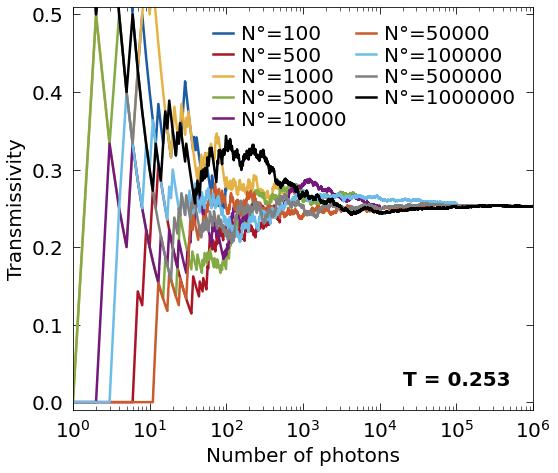

In [155]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.1, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

handles = []
labels  = []
for i in range(len(n_photons)):
    #x = [(ni / eval('N'+ str(n_photons[i]))[1][0][-1])*100 for ni in eval('N'+ str(n_photons[i]))[1][0]]
    x = eval('N'+ str(n_photons[i]))[1][0]
    globals()['h'+str(i)] = ax.plot(x, eval('N'+ str(n_photons[i]))[1][1],
                                    color = colors[i], alpha = 1,
                                    linestyle = 'solid', linewidth = 2.5)
    handles = handles + eval('h'+str(i))
    labels.append('N°=' + str(n_photons[i]))

# X Axis:
ax.set_xlabel('Number of photons', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(1, .1e7)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.set_xscale('log')
#ax.xaxis.set_major_locator(ticker.LogLocator(base = 10, numticks = 9))

# Y Axis:
ax.set_ylabel('Transmissivity', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(-0.01, 0.51)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)

# LEGEND:
legend  = ax.legend(handles, labels, loc = 'upper right', ncol = 2,
                    handlelength = 1, handletextpad = .4, labelspacing = .12,
                    columnspacing = .5, numpoints = 1, frameon = False,
                    prop = {'size': fontsize1})

# ADDITIONAL TEXT:
ax.text(0.95, 0.05, 'T = '+str(final_T), fontsize = fontsize1, fontweight = 'bold',
        color = 'black', ha = 'right', va = 'bottom', transform = ax.transAxes)

#### Reflectivity

Text(0.95, 0.05, 'R = 0.747')

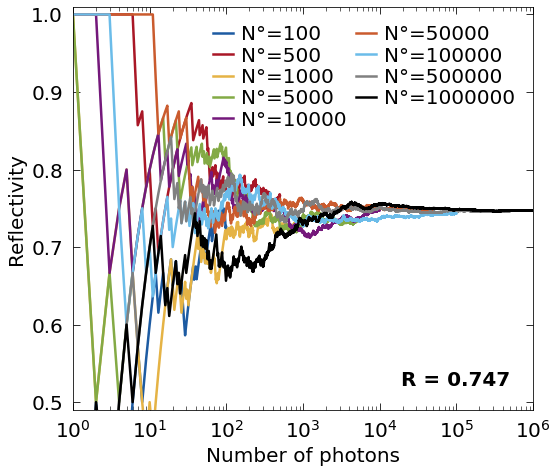

In [160]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.1, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

handles = []
labels  = []
for i in range(len(n_photons)):
    #x = [(ni / eval('N'+ str(n_photons[i]))[1][0][-1])*100 for ni in eval('N'+ str(n_photons[i]))[1][0]]
    x = eval('N'+ str(n_photons[i]))[1][0]
    globals()['h'+str(i)] = ax.plot(x, eval('N'+ str(n_photons[i]))[1][2],
                                    color = colors[i], alpha = 1,
                                    linestyle = 'solid', linewidth = 2.5)
    handles = handles + eval('h'+str(i))
    labels.append('N°=' + str(n_photons[i]))

# X Axis:
ax.set_xlabel('Number of photons', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(1, .1e7)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.set_xscale('log')
#ax.xaxis.set_major_locator(ticker.LogLocator(base = 10, numticks = 9))
#ax.xaxis.set_minor_locator(ticker.LogLocator(base = 10, numticks = 90))

# Y Axis:
ax.set_ylabel('Reflectivity', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(0.49, 1.01)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)

# LEGEND:
legend  = ax.legend(handles, labels, loc = 'upper right', ncol = 2,
                    handlelength = 1, handletextpad = .4, labelspacing = .12,
                    columnspacing = .5, numpoints = 1, frameon = False,
                    prop = {'size': fontsize1})

# ADDITIONAL TEXT:
ax.text(0.95, 0.05, 'R = '+str(final_R), fontsize = fontsize1, fontweight = 'bold',
        color = 'black', ha = 'right', va = 'bottom', transform = ax.transAxes)

Theoretical values:

In [90]:
taum = (1-g)*tau

In [91]:
T_theo = 2/(2+taum)
R_theo = taum/(2+taum)

In [92]:
T_theo

0.333555703802535

In [93]:
R_theo

0.6664442961974649

### QUESTION 2

We pick 50,000 photons

In [161]:
n_photons = 50000 # (NUMBER)
mu_0      = -0.7 # Cosine of zenith angle (solar zenith angle?) respect to z axis? (mu0 = -0.7)
tau       = 4 # Optical Depth

In [162]:
Tq2 = []
Rq2 = []
for i in range(10):
    opt_prop = mc_radtran(n_photons, g, w_0, mu_0, tau)
    Tq2.append(round(opt_prop[0][1][-1],3))
    Rq2.append(round(opt_prop[0][2][-1],3))
print('Mean Transmissivity:',np.mean(Tq2))
print('Sigma Transmissivity:',np.std(Tq2))
print('Mean Reflectivity:',np.mean(Rq2))
print('Sigma Reflectivity:',np.std(Rq2))  

Mean Transmissivity: 0.25200000000000006
Sigma Transmissivity: 0.001095445115010333
Mean Reflectivity: 0.748
Sigma Reflectivity: 0.0010954451150103333


It takes around 1 minute

### QUESTION 3

In [163]:
n_photons = 50000 # (NUMBER)
mu_0      = np.arange(-0.9, -0.1+0.04, 0.04)[::-1] # Cosine of zenith angle (solar zenith angle?) respect to z axis? (mu0 = -0.7)
tau       = 4 # Optical Depth

In [164]:
Tq3 = []
Rq3 = []
for i in range(len(mu_0)):
    opt_prop = mc_radtran(n_photons, g, w_0, mu_0[i], tau)
    Tq3.append(round(opt_prop[0][1][-1],3))
    Rq3.append(round(opt_prop[0][2][-1],3))
    timei = round(sum(opt_prop[0][4])*0.001,2)
    print('mu_0:',mu_0[i],', Time:',timei)

Text(0.05, 0.05, 'g = 0.001\n$w_0$ = 0.99999')

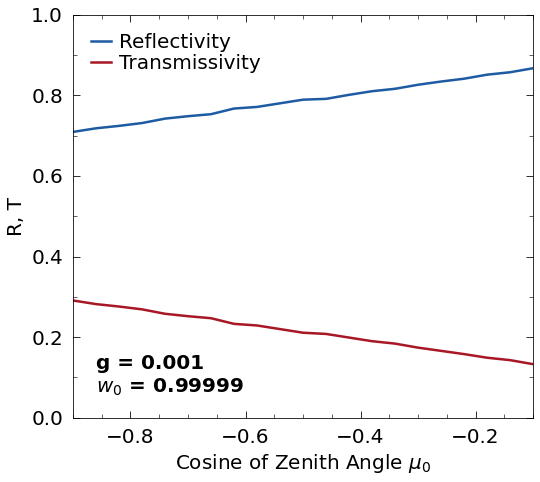

In [181]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.1, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

handles = []
labels  = []

h1 = ax.plot(mu_0, Rq3, color = colors[0], alpha = 1, linestyle = 'solid', linewidth = 2.5)
h2 = ax.plot(mu_0, Tq3, color = colors[1], alpha = 1, linestyle = 'solid', linewidth = 2.5)
handles = h1 + h2
labels  = ['Reflectivity', 'Transmissivity']

# X Axis:
ax.set_xlabel(r'Cosine of Zenith Angle $\mu_0$', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(-.9, -.1)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
#ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.MultipleLocator(.2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.05))

# Y Axis:
ax.set_ylabel('R, T', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(0, 1)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))

# LEGEND:
legend  = ax.legend(handles, labels, loc = 'upper left', ncol = 1,
                    handlelength = 1, handletextpad = .4, labelspacing = .12,
                    columnspacing = .5, numpoints = 1, frameon = False,
                    prop = {'size': fontsize1})

# ADDITIONAL TEXT:
ax.text(0.05, 0.05, 'g = '+str(g)+'\n'+r'$w_0$ = '+str(w_0)+'\n'+r'$\tau$ = '+str(4), fontsize = fontsize1, fontweight = 'bold',
        color = 'black', ha = 'left', va = 'bottom', transform = ax.transAxes)

In [169]:
np.rad2deg(np.arccos(-0.1))

95.73917047726678

In [180]:
np.rad2deg(np.arccos(-0.9))

154.15806723683286

### QUESTION 4

In [182]:
n_photons = 50000 # (NUMBER)
mu_0      = -0.7 # Cosine of zenith angle (solar zenith angle?) respect to z axis? (mu0 = -0.7)
tau       = np.arange(1, 8.35,  0.35) # Optical Depth

In [186]:
Tq4          = []
Rq4          = []
time_per_tau = []
for i in range(len(tau)):
    opt_prop = mc_radtran(n_photons, g, w_0, mu_0, tau[i])
    Tq4.append(round(opt_prop[0][1][-1],3))
    Rq4.append(round(opt_prop[0][2][-1],3))
    timei = round(sum(opt_prop[0][4])*0.001,2)
    time_per_tau.append(timei)
    print('tau:',tau[i],', Time:',timei)

4.04
6.33
7.86
9.7
12.83
22.95
15.08
16.01
17.9
18.14
20.86
21.6
22.87
24.63
26.92
27.43
26.76
29.92
34.67
34.81
34.57


Text(0.05, 0.05, 'g = 0.001\n$w_0$ = 0.99999\n$\\mu_0$ = -0.7')

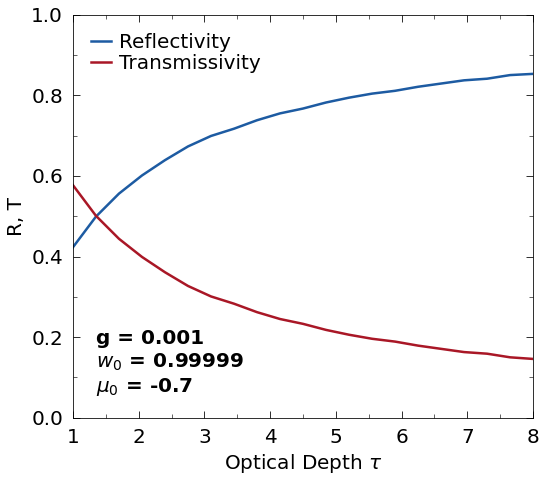

In [187]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.1, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

handles = []
labels  = []

h1 = ax.plot(tau, Rq4, color = colors[0], alpha = 1, linestyle = 'solid', linewidth = 2.5)
h2 = ax.plot(tau, Tq4, color = colors[1], alpha = 1, linestyle = 'solid', linewidth = 2.5)
handles = h1 + h2
labels  = ['Reflectivity', 'Transmissivity']

# X Axis:
ax.set_xlabel(r'Optical Depth $\tau$', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(1, 8)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
#ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.5))

# Y Axis:
ax.set_ylabel('R, T', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(0, 1)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))

# LEGEND:
legend  = ax.legend(handles, labels, loc = 'upper left', ncol = 1,
                    handlelength = 1, handletextpad = .4, labelspacing = .12,
                    columnspacing = .5, numpoints = 1, frameon = False,
                    prop = {'size': fontsize1})

# ADDITIONAL TEXT:
ax.text(0.05, 0.05, 'g = '+str(g)+'\n'+r'$w_0$ = '+str(w_0)+'\n'+r'$\mu_0$ = '+str(mu_0), fontsize = fontsize1, fontweight = 'bold',
        color = 'black', ha = 'left', va = 'bottom', transform = ax.transAxes)

Text(0.95, 0.05, 'g = 0.001\n$w_0$ = 0.99999\n$\\mu_0$ = -0.7')

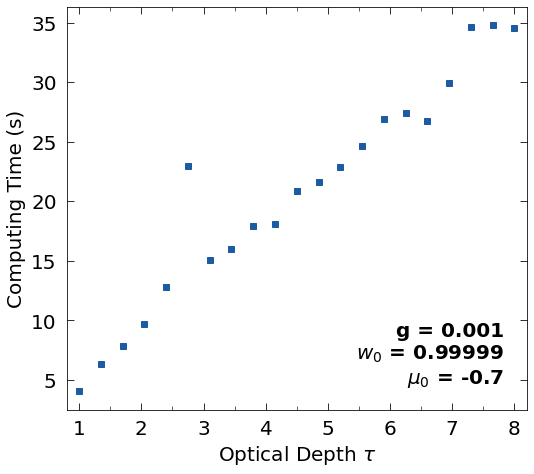

In [192]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.1, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

handles = []
labels  = []

h1 = ax.plot(tau, time_per_tau, 's', markersize = 6, color = colors[0], alpha = 1)

# X Axis:
ax.set_xlabel(r'Optical Depth $\tau$', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(.8, 8.2)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.5))

# Y Axis:
ax.set_ylabel('Computing Time (s)', fontsize = fontsize1, color = 'black', labelpad = 5)
#ax.set_ylim(0, 1)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
#ax.yaxis.set_major_locator(ticker.MultipleLocator(.2))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))

# ADDITIONAL TEXT:
ax.text(0.95, 0.05, 'g = '+str(g)+'\n'+r'$w_0$ = '+str(w_0)+'\n'+r'$\mu_0$ = '+str(mu_0), fontsize = fontsize1, fontweight = 'bold',
        color = 'black', ha = 'right', va = 'bottom', transform = ax.transAxes)

In [193]:
35/8

4.375

4.4 seconds per optical depth unit